<a href="https://colab.research.google.com/github/Srija-Burugula/IITH/blob/main/AIML_Module_5_Lab_2_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Lab 2: Loss Functions


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


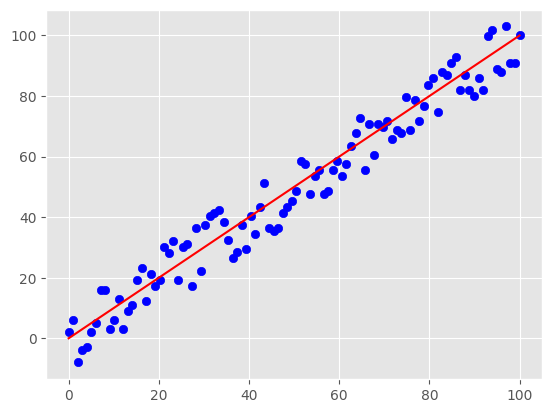

In [ ]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [ ]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [ ]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

1/1+e^(-x)

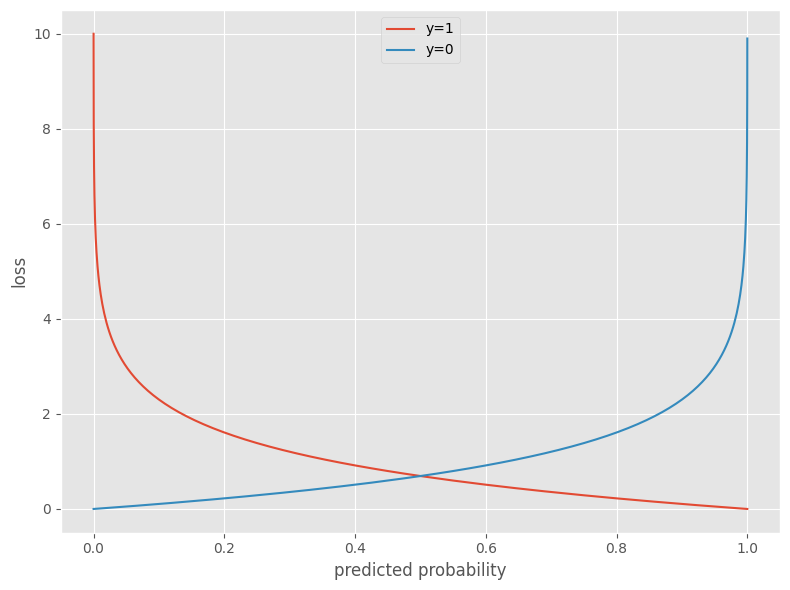

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

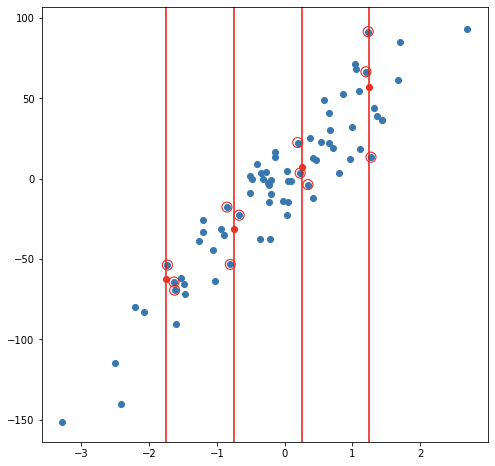

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [ ]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

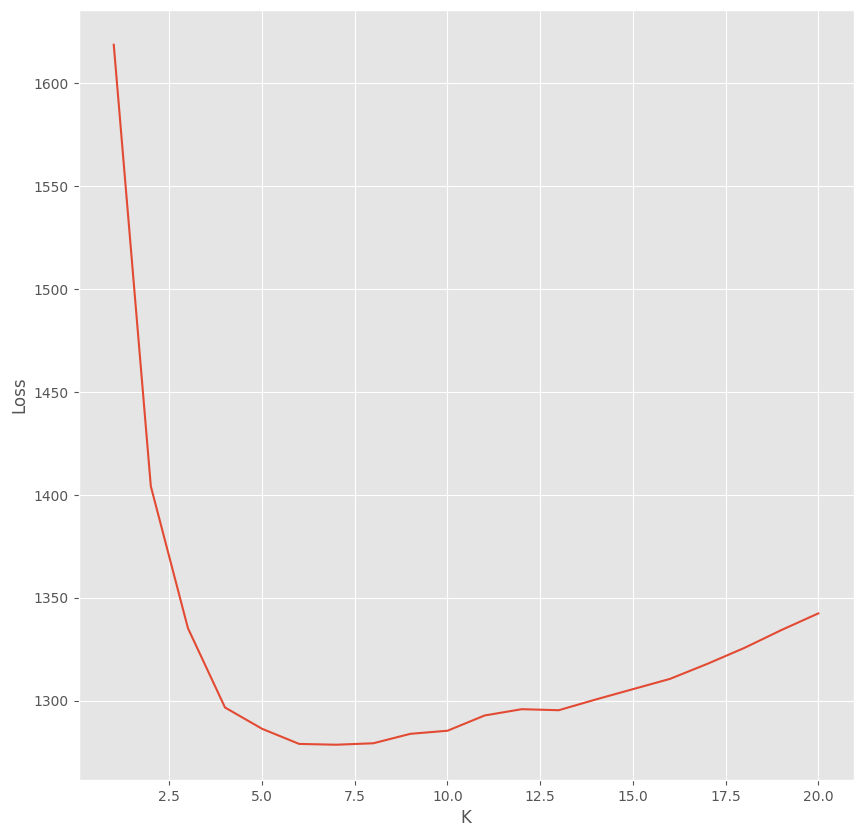

Minimum error 1278.5816281094171 is at k = 6


In [ ]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
2. Explore other loss functions and try to understand when and why they are used.
3. Try out KNN-regression on other datasets see which values of K give the best results.

1.Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.

Loss functions—Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE)—on a regression task using some generated data. We'll observe how these loss functions handle different aspects of model performance.

First, let's generate some synthetic data for our regression task:

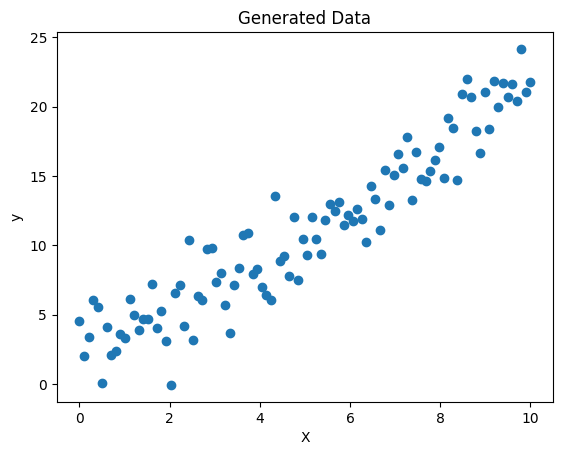

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generating synthetic data
np.random.seed(0)
X = np.linspace(0, 10, 100)
y_actual = 2 * X + 1 + np.random.randn(100) * 2  # Generating y with noise

plt.scatter(X, y_actual)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()


Now, we can implement and evaluate models using MSE, RMSE, and MAE:

In [ ]:
# Model predictions (considering a simple linear model)
y_pred = 2 * X + 1  # Assuming the model perfectly predicts the true relationship

# Calculating different loss functions
mse = np.mean((y_actual - y_pred) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_actual - y_pred))

print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)


MSE:  4.077614471748418
RMSE:  2.0193103950974
MAE:  1.6194116311483993


Observations:

MSE: Square of the errors between predicted and actual values. MSE penalizes larger errors more significantly due to squaring. Outliers have a larger impact, making the model sensitive to them.

RMSE: Square root of MSE. It maintains the same unit as the target variable, providing a more interpretable error metric compared to MSE.

MAE: Absolute differences between predicted and actual values. It's less sensitive to outliers compared to MSE.

2.Explore other loss functions and try to understand when and why they are used.


**Huber Loss**

Huber loss is a combination of MSE and MAE and is less sensitive to outliers than MSE. It calculates the loss as MAE for samples where the absolute error is smaller than a threshold δ and as MSE for samples where the absolute error exceeds δ.

The Huber loss function is defined as:*italicised text*

In [ ]:
def huber_loss(y_true, y_pred, delta):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    loss = np.where(is_small_error, 0.5 * (error ** 2), delta * (np.abs(error) - 0.5 * delta))
    return np.mean(loss)


This loss function provides a balance between the robustness of MAE against outliers and the differentiability of MSE, making it useful in situations where the data might contain outliers but a smoother loss function is preferred compared to pure MAE.

**Quantile Loss**

Quantile loss is used in quantile regression, where the goal is to predict specific quantiles of the target variable's distribution rather than its mean. It measures the accuracy of these quantile predictions.

The quantile loss function is defined as:

In [ ]:
def quantile_loss(y_true, y_pred, q):
    error = y_true - y_pred
    loss = np.where(error >= 0, q * error, (q - 1) * error)
    return np.mean(loss)


Here, 'q' represents the quantile level. By setting different values of 'q' (e.g., 0.5 for the median, 0.25 for the lower quartile, etc.), you can estimate various points in the distribution.

Quantile regression and its loss function are useful when dealing with asymmetric distributions or when predicting specific levels of uncertainty in the predictions.

**Log-Cosh Loss**

Log-Cosh loss is smooth and less sensitive to outliers compared to MSE. It is defined as a logarithm of the hyperbolic cosine of the error between the predicted and true values.

In [ ]:
def log_cosh_loss(y_true, y_pred):
    error = y_true - y_pred
    loss = np.log(np.cosh(error))
    return np.mean(loss)


This loss function provides a smooth gradient for backpropagation while still capturing the essence of the error magnitude between predictions and true values.

3.Try out KNN-regression on other datasets see which values of K give the best results.

The diabetes dataset available in scikit-learn, which contains ten baseline variables (like age, BMI, blood pressure) and a target variable (diabetes progression after a year) to perform KNN regression.

Here's an example using the diabetes dataset:

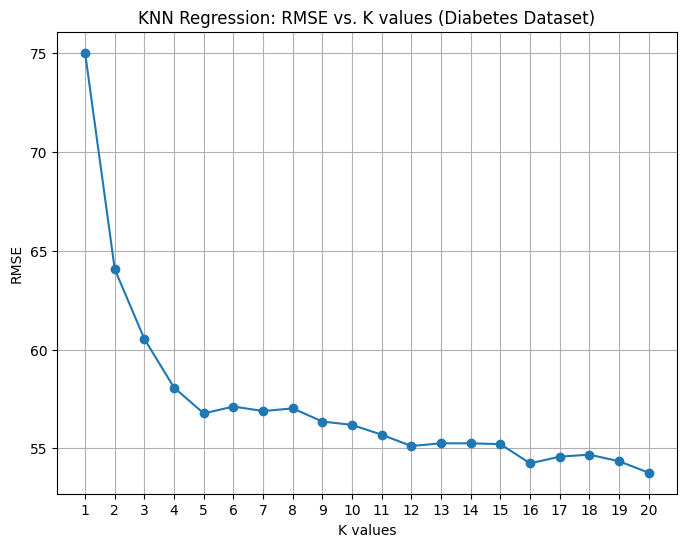

Optimal K value: 20


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform KNN regression for different K values
k_values = range(1, 21)
rmse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
    rmse_values.append(rmse)

# Plot RMSE against different K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, rmse_values, marker='o')
plt.xlabel('K values')
plt.ylabel('RMSE')
plt.title('KNN Regression: RMSE vs. K values (Diabetes Dataset)')
plt.xticks(k_values)
plt.grid()
plt.show()

# Find the optimal K value
optimal_k = k_values[rmse_values.index(min(rmse_values))]
print(f"Optimal K value: {optimal_k}")


This code performs KNN regression on the diabetes dataset, iterates through different K values, and plots the RMSE against these values. Finally, it identifies the optimal K value based on the lowest RMSE.